# Problem Statement:-


This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv




In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
# there are  some null values present in the dataset

In [8]:
# all thee columns except 'Date' have float datatype.
# columns 'Date' have object datatype.

In [9]:
df.duplicated().sum()

0

In [10]:
# there are no duplicated values present.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [12]:
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [13]:
# first we will deal with the missing values.

<AxesSubplot:>

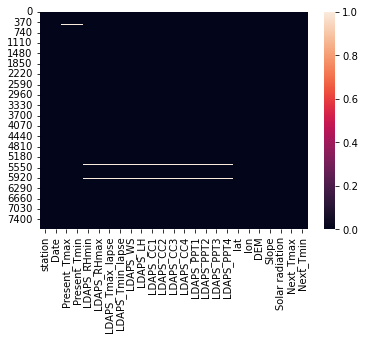

In [14]:
sns.heatmap(df.isna())

In [15]:
# By studying the above heatmap, we can see that the null values are present in some rows specifically, so it better to remove those rows instead of filling the null values.

In [16]:
df.dropna(inplace=True)

In [17]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [18]:
positions=pd.isnull(df)


In [19]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [20]:
# now There are no null values present.

<AxesSubplot:>

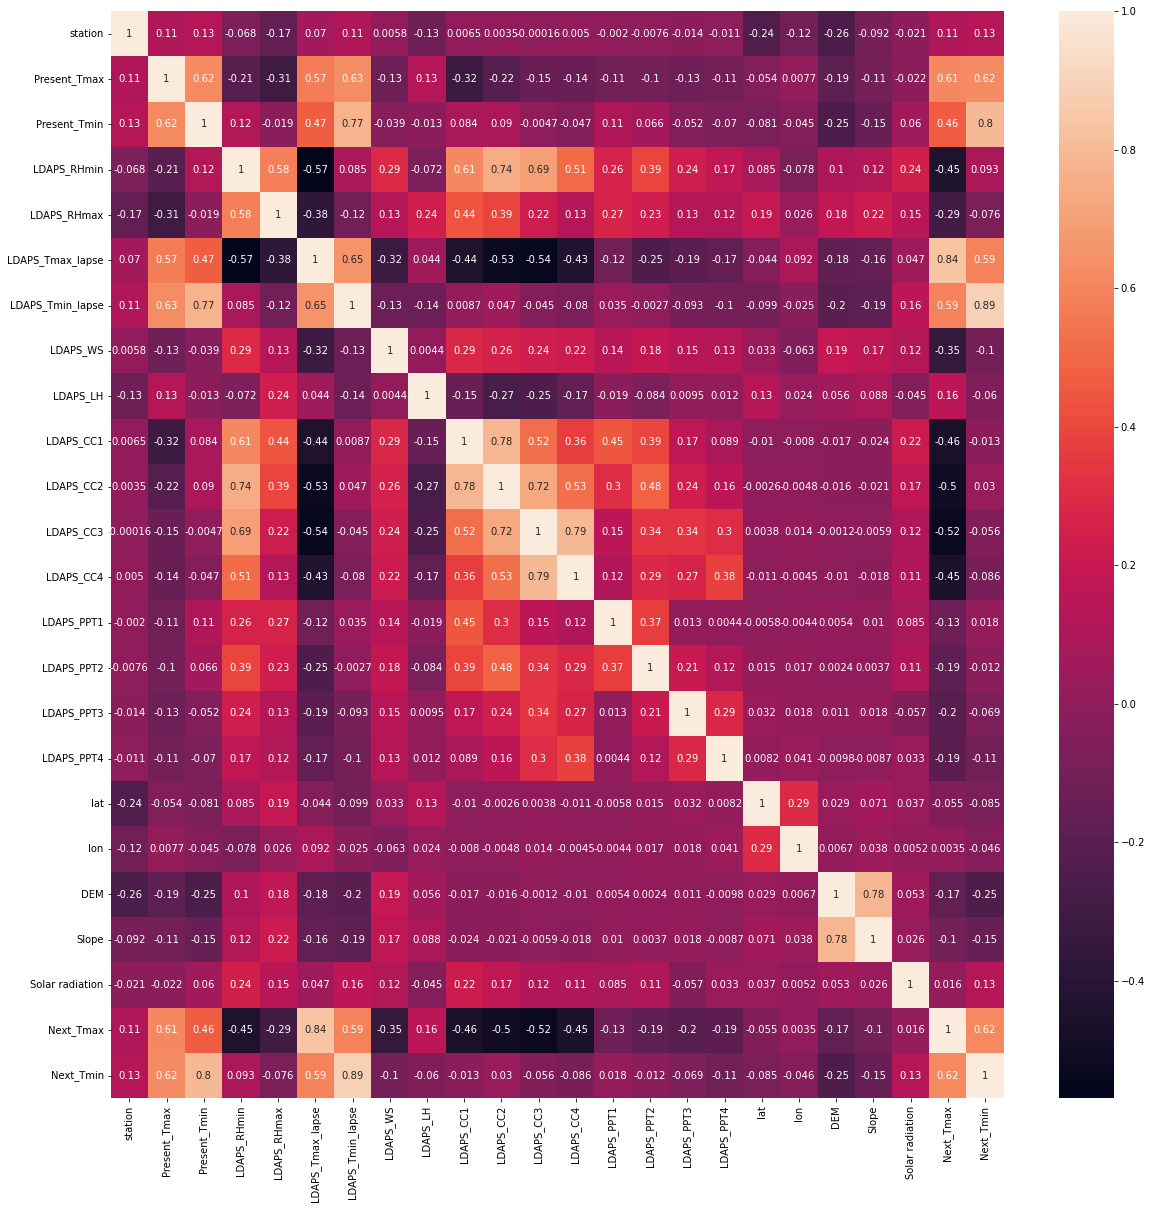

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [22]:
# Column 'Next_Tmax' and 'Next_Tmin' are our target variable.
# First we will take column 'Next_Tmax' as our target variable.

In [23]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [24]:
# collumn 'Date' will not contribute much in the model building, so we will remove it.

In [25]:
df=df.drop(columns=['Date'])

In [26]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [27]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [28]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [29]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

# Data Visualisation

Text(0, 0.5, 'Present_Tmax')

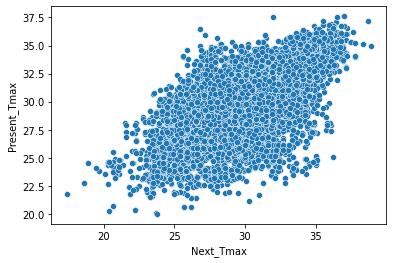

In [30]:
sns.scatterplot(df['Next_Tmax'],df['Present_Tmax'])
plt.xlabel('Next_Tmax')
plt.ylabel('Present_Tmax')

Text(0, 0.5, 'LDAPS_Tmax_lapse')

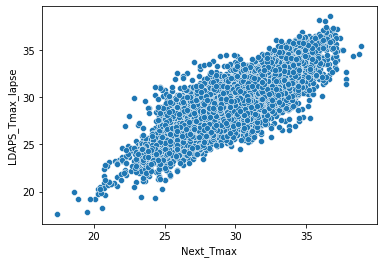

In [31]:
sns.scatterplot(df['Next_Tmax'],df['LDAPS_Tmax_lapse'])
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_Tmax_lapse')

Text(0, 0.5, 'Next_Tmin')

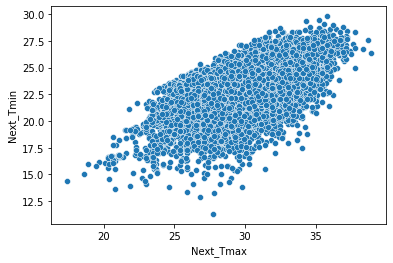

In [32]:
sns.scatterplot(df['Next_Tmax'],df['Next_Tmin'])
plt.xlabel('Next_Tmax')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'LDAPS_CC3')

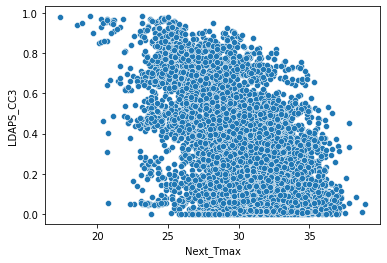

In [33]:
sns.scatterplot(df['Next_Tmax'],df['LDAPS_CC3'])
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_CC3')

In [34]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [35]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


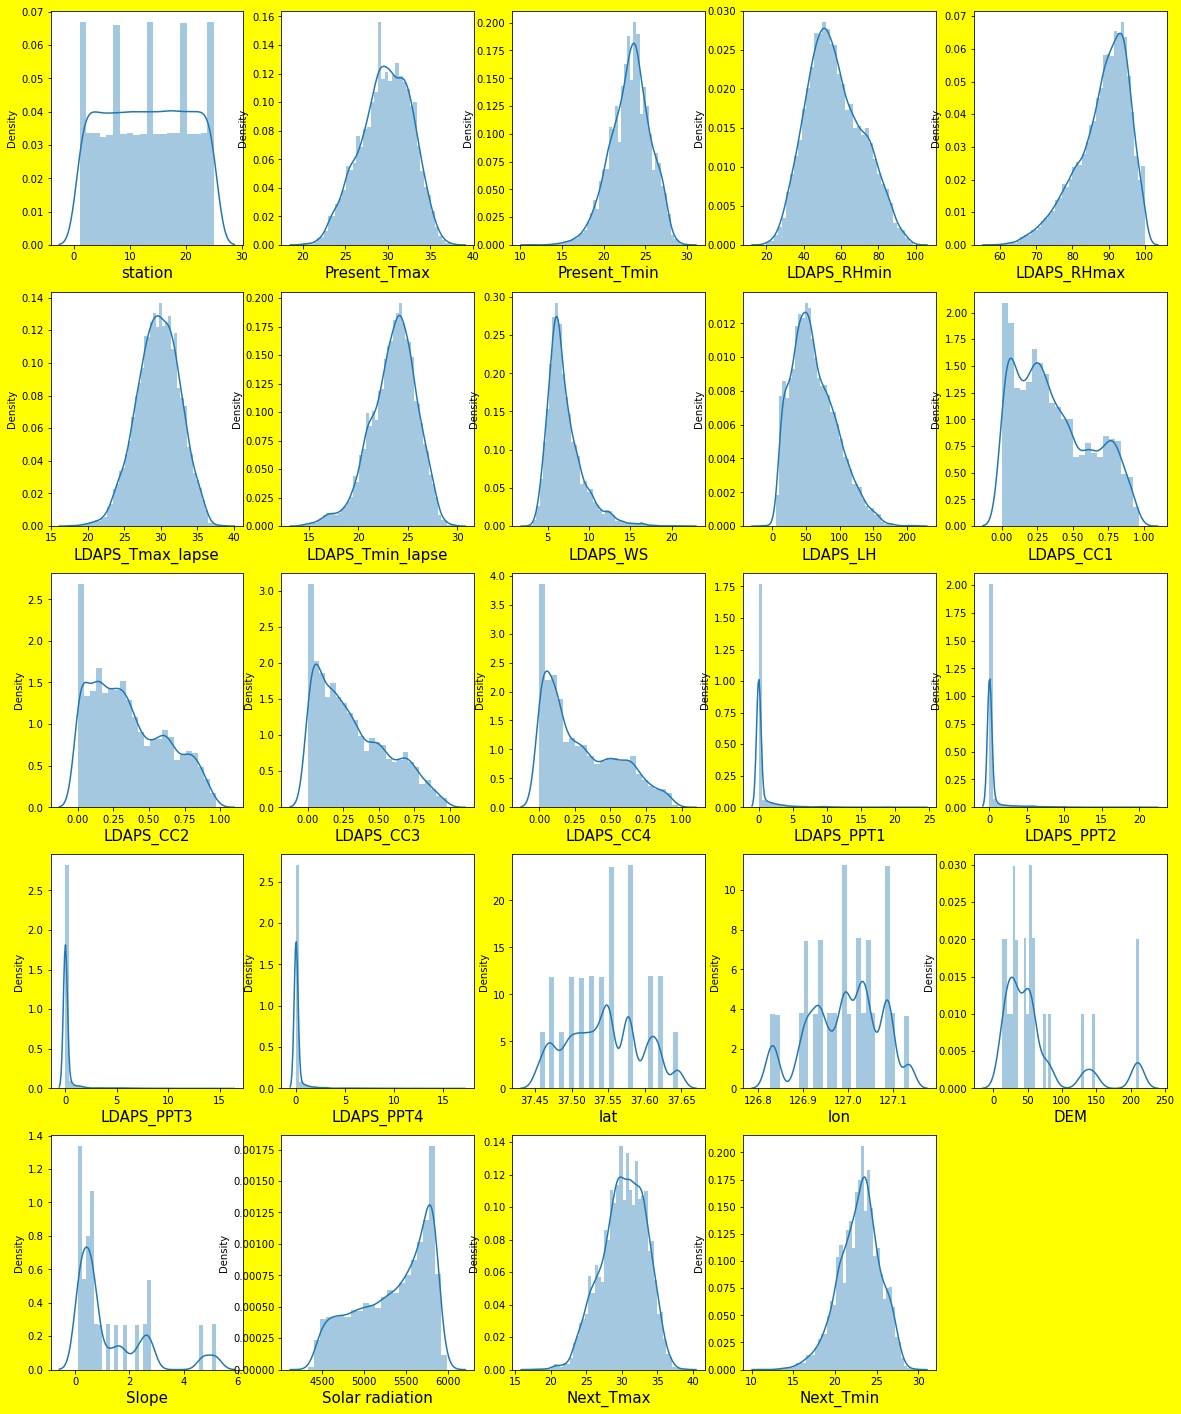

In [36]:
plt.figure(figsize=(20,25),facecolor='Yellow')
pltno=1

for c in df:
    if pltno<=24:
        ax=plt.subplot(5,5,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

In [37]:
# there are definitely some skewness present in the dataset.

In [38]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

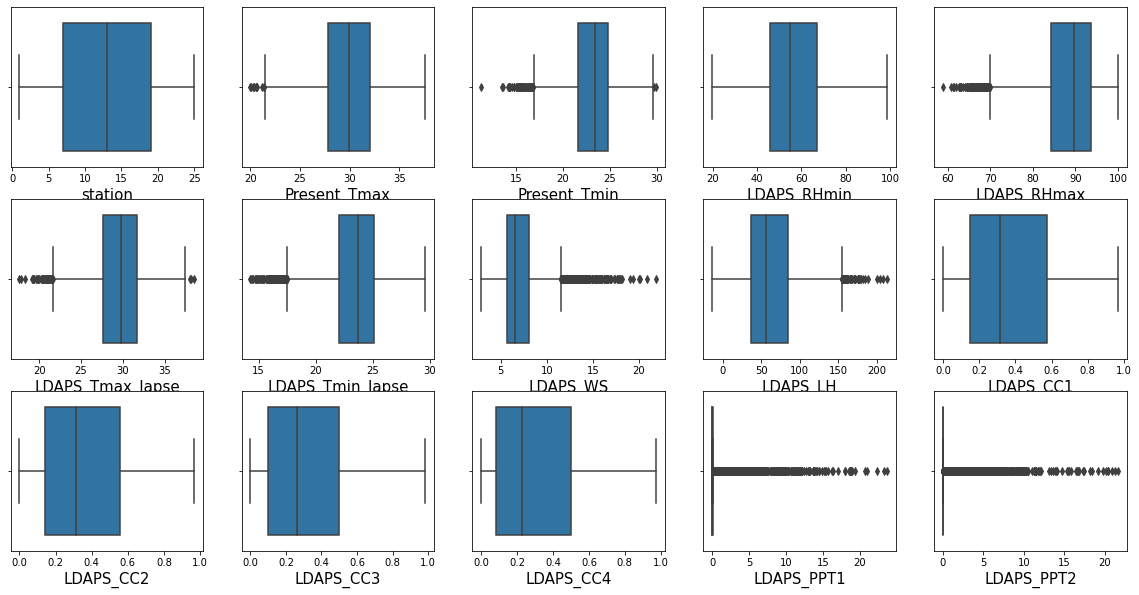

In [39]:
plt.figure(figsize=(20,10),facecolor='w')
pn=1
for c in df:
    if pn<=15:
        ax=plt.subplot(3,5,pn)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
    pn+=1

In [40]:
# There are outliers present in the dataset, we will first deal with the outliers

In [41]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(7588, 24)

In [42]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [43]:
 df1=df[(z<3).all(axis=1)]
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [44]:
df1.shape

(6739, 24)

In [45]:
df.shape

(7588, 24)

In [46]:
# data loss

(7588-6739)/7588*100

11.188719030047443

In [47]:
# data loss is just above 10% , and considering the dataset having lot of rows and columns, we can afford 11.18% of data loss

In [48]:
# now let's seperate the features and label.

In [49]:
x=df1.drop(columns=['Next_Tmax'])
y=df1['Next_Tmax']

In [50]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,18.8


In [51]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6739, dtype: float64

In [52]:
x.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmin          -0.234328
dtype: float64

In [53]:
# there are skewness present in some of the columns, so we will fix them

In [54]:
s=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']


In [55]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')

In [56]:
x[s] = yj.fit_transform(x[s].values)

In [57]:
x.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.520157
Next_Tmin          -0.234328
dtype: float64

In [58]:
# now we can observe that the skewness has been controlled by some end.

In [59]:
# now we will standardise the data.

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-1.67271855, -0.42570408, -0.81445954, ...,  1.32777608,
         1.54306808, -0.79058687],
       [-1.5339585 ,  0.69021541, -0.72778535, ..., -0.3758583 ,
         1.24950169, -0.23915062],
       [-1.39519845,  0.58559796,  0.00894523, ..., -0.94411521,
         1.23582661,  0.35470379],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ..., -1.2785019 ,
        -2.13788629, -2.10555022],
       [ 1.51876264, -2.30881822, -2.41793199, ..., -1.06901788,
        -2.14962204, -1.80862301],
       [ 1.65752269, -2.3436907 , -2.54794327, ..., -0.92987072,
        -2.11880846, -2.40247743]])

In [61]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [62]:
xx

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.672719,-0.425704,-0.814460,0.195915,0.437537,-0.662498,-0.289928,-0.020735,0.225115,-0.440130,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.002925,1.854393,1.327776,1.543068,-0.790587
1,-1.533959,0.690215,-0.727785,-0.236604,0.364239,-0.016693,0.171379,-0.631488,-0.298746,-0.473686,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.518733,0.069704,-0.375858,1.249502,-0.239151
2,-1.395198,0.585598,0.008945,-0.494494,-0.585732,0.070769,0.409475,-0.389607,-1.236867,-0.537958,...,-0.52537,-0.484794,-0.461889,-0.414444,0.671467,0.845830,-0.353433,-0.944115,1.235827,0.354704
3,-1.256438,0.725088,0.052282,0.194767,1.206456,-0.069787,-0.146681,-0.654162,0.113709,-0.510012,...,-0.52537,-0.484794,-0.461889,-0.414444,2.018714,0.392926,0.098766,1.249133,1.220170,0.524376
4,-1.117678,0.515853,-0.597774,0.045667,0.299831,-0.284509,-0.074752,-0.608123,1.377075,-0.768323,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,1.814542,-0.278815,-0.392364,1.226317,-0.239151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.404059,-0.757521,-2.400625,-0.137593,-1.564654,-1.159992,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,0.619378,-0.712912,-0.269357,-2.107693,-2.275223
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.626356,-1.160213,-2.620034,-0.590197,0.604824,-1.106080,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.675779,1.198089,-0.999559,-1.353609,-2.141474,-2.529732
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.316889,-1.288468,-2.188536,-0.383811,0.303076,-1.250919,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.136081,-1.255142,-1.576584,-1.278502,-2.137886,-2.105550
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.542506,-1.049238,-2.207453,-0.170344,-0.439205,-1.227700,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.405930,-1.028689,-1.397502,-1.069018,-2.149622,-1.808623


In [63]:
# now we will check the vif values

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

In [66]:
vif

,Vif values,features
0,1.291772,station
1,2.796579,Present_Tmax
2,3.326071,Present_Tmin
3,5.951950,LDAPS_RHmin
4,2.254915,LDAPS_RHmax
5,6.821571,LDAPS_Tmax_lapse
6,8.475542,LDAPS_Tmin_lapse
7,1.214516,LDAPS_WS
8,1.543654,LDAPS_LH
9,4.851972,LDAPS_CC1


In [67]:
# the vif values of all the features are under 10.

In [68]:
# now we will build the models.

In [69]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6739, dtype: float64

In [70]:
# importing thee necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [72]:
scaled_x

array([[-1.67271855, -0.42570408, -0.81445954, ...,  1.32777608,
         1.54306808, -0.79058687],
       [-1.5339585 ,  0.69021541, -0.72778535, ..., -0.3758583 ,
         1.24950169, -0.23915062],
       [-1.39519845,  0.58559796,  0.00894523, ..., -0.94411521,
         1.23582661,  0.35470379],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ..., -1.2785019 ,
        -2.13788629, -2.10555022],
       [ 1.51876264, -2.30881822, -2.41793199, ..., -1.06901788,
        -2.14962204, -1.80862301],
       [ 1.65752269, -2.3436907 , -2.54794327, ..., -0.92987072,
        -2.11880846, -2.40247743]])

In [73]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8029536791116443 on Random State: 43


In [74]:
# best random state is 43

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.25,random_state=43)

In [76]:
# LINEAR REGRESSION

from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.8029536791116443
Mean absolute error:  1.0065163056284323
Mean squared error:  1.7485728039907154


In [77]:
# 80.29% accuracy

In [78]:
# RANDOMFOREST REGRESSOR

r= RandomForestRegressor()
r.fit(xtrain, ytrain)
rpred = r.predict(xtest)
print(r2_score(ytest, rpred))
print("Mean absolute error: ", mean_absolute_error(ytest,rpred))
print("Mean squared error: ", mean_squared_error(ytest,rpred))

0.8963007607505884
Mean absolute error:  0.7162801186943619
Mean squared error:  0.9202184985163202


In [79]:
# 89.63% accuracy

In [80]:
# DECISIONTREE REGRESSOR

dt= DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
dpred = dt.predict(xtest)
print(r2_score(ytest, dpred))
print("Mean absolute error: ", mean_absolute_error(ytest,dpred))
print("Mean squared error: ", mean_squared_error(ytest,dpred))

0.7656132398147784
Mean absolute error:  1.025519287833828
Mean squared error:  2.079928783382789


In [81]:
# 76.56% accuracy

In [82]:
# ADABOOST REGRESSOR
a=AdaBoostRegressor()
a.fit(xtrain,ytrain)
apred=a.predict(xtest)
print(r2_score(ytest, apred))
print("Mean absolute error: ", mean_absolute_error(ytest,apred))
print("Mean squared error: ", mean_squared_error(ytest,apred))

0.7698041655208911
Mean absolute error:  1.1557538148548048
Mean squared error:  2.0427388542320366


In [83]:
# 76.98% accuracy

In [84]:
# SVR
svr=SVR()
svr.fit(xtrain,ytrain)
spred=svr.predict(xtest)
print(r2_score(ytest, spred))
print("Mean absolute error: ", mean_absolute_error(ytest,spred))
print("Mean squared error: ", mean_squared_error(ytest,spred))

0.8730580789483848
Mean absolute error:  0.7761619790800863
Mean squared error:  1.1264721403398081


In [85]:
# 87.30% accuracy

In [86]:
# KNEIGHBORS REGRESSOR
k=KNeighborsRegressor()
k.fit(xtrain,ytrain)
kpred=k.predict(xtest)
print(r2_score(ytest, kpred))
print("Mean absolute error: ", mean_absolute_error(ytest,kpred))
print("Mean squared error: ", mean_squared_error(ytest,kpred))

0.8496401322670363
Mean absolute error:  0.8866824925816024
Mean squared error:  1.3342810682492583


In [87]:
# 84.96% accuracy

# CrossValidation Score

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
# Linear Regression

s=cross_val_score(lr,scaled_x,y)
print(s)
print(s.mean())

[0.75757979 0.68650369 0.7052969  0.75912826 0.68329731]
0.7183611892612507


In [90]:
# RandomForest Regressor

s=cross_val_score(r,scaled_x,y)
print(s)
print(s.mean())

[0.73997441 0.67528874 0.67090213 0.72453047 0.65260961]
0.6926610719874793


In [91]:
# DecisionTree Regressor

s=cross_val_score(dt,scaled_x,y)
print(s)
print(s.mean())

[0.45296676 0.43990131 0.34079454 0.52420411 0.44925326]
0.4414239968450088


In [92]:
# Adaboost Regressor

s=cross_val_score(a,scaled_x,y)
print(s)
print(s.mean())

[0.70871641 0.61818412 0.63782054 0.68601031 0.62631642]
0.6554095598114758


In [93]:
# SVR

ss=cross_val_score(svr,scaled_x,y)
print(ss)
print(ss.mean())

[0.72425784 0.58967284 0.66651039 0.75946006 0.64619268]
0.6772187614352193


In [94]:
# KNeighbors Regressor

s=cross_val_score(k,scaled_x,y)
print(s)
print(s.mean())

[0.62520209 0.49553841 0.52196957 0.62925851 0.58277607]
0.5709489279851094


In [95]:
# as per the above observation, Linear regression model is our best model of the all.

In [96]:
#predicted values
print('predicted values:-',lpred)
print('actual values:-',ytest)

predicted values:- [28.98772367 32.68123252 28.04672656 ... 30.23170852 24.01593847
 29.79725547]
actual values:- 5006    28.6
947     33.4
3726    29.8
715     29.3
4242    33.0
        ... 
7073    35.1
5959    33.9
4402    29.5
7354    26.3
7610    29.3
Name: Next_Tmax, Length: 1685, dtype: float64


In [97]:
d=pd.DataFrame({'predicted values':lpred,'actual values':ytest})

In [98]:
d

,predicted values,actual values
5006,28.987724,28.6
947,32.681233,33.4
3726,28.046727,29.8
715,29.790365,29.3
4242,33.019433,33.0
...,...,...
7073,35.420647,35.1
5959,33.977601,33.9
4402,30.231709,29.5
7354,24.015938,26.3


# Saving the model.

In [99]:
import joblib
joblib.dump(lr,'Temp_Pred_Next_Tmax')

['Temp_Pred_Next_Tmax']

In [100]:
# load the model

In [101]:
p = joblib.load("Temp_Pred_Next_Tmax")
print(p.predict(xtest))

[28.98772367 32.68123252 28.04672656 ... 30.23170852 24.01593847
 29.79725547]


# Now we will build the model by taking column 'Next_Tmin' as our target variable

In [102]:
df1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [103]:
# all the outliers have already been removed

In [104]:
x=df1.drop(columns=['Next_Tmin'])
y=df1['Next_Tmin']

In [105]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6


In [106]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6739, dtype: float64

In [107]:
x.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
dtype: float64

In [108]:
# remove the skewness

In [109]:
s=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']


In [110]:
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')

In [111]:
x[s] = yj.fit_transform(x[s].values)

In [112]:
x.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.520157
Next_Tmax          -0.267526
dtype: float64

In [113]:
# now we will standardise the data.

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledx = sc.fit_transform(x)
scaledx

array([[-1.67271855, -0.42570408, -0.81445954, ...,  1.32777608,
         1.54306808, -0.48995143],
       [-1.5339585 ,  0.69021541, -0.72778535, ..., -0.3758583 ,
         1.24950169, -0.0111348 ],
       [-1.39519845,  0.58559796,  0.00894523, ..., -0.94411521,
         1.23582661,  0.19407233],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ..., -1.2785019 ,
        -2.13788629, -0.76356093],
       [ 1.51876264, -2.30881822, -2.41793199, ..., -1.06901788,
        -2.14962204, -0.66095736],
       [ 1.65752269, -2.3436907 , -2.54794327, ..., -0.92987072,
        -2.11880846, -0.93456687]])

In [115]:
x1=pd.DataFrame(scaledx,columns=x.columns)

In [116]:
x1

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.672719,-0.425704,-0.814460,0.195915,0.437537,-0.662498,-0.289928,-0.020735,0.225115,-0.440130,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.002925,1.854393,1.327776,1.543068,-0.489951
1,-1.533959,0.690215,-0.727785,-0.236604,0.364239,-0.016693,0.171379,-0.631488,-0.298746,-0.473686,...,-0.52537,-0.484794,-0.461889,-0.414444,1.211166,0.518733,0.069704,-0.375858,1.249502,-0.011135
2,-1.395198,0.585598,0.008945,-0.494494,-0.585732,0.070769,0.409475,-0.389607,-1.236867,-0.537958,...,-0.52537,-0.484794,-0.461889,-0.414444,0.671467,0.845830,-0.353433,-0.944115,1.235827,0.194072
3,-1.256438,0.725088,0.052282,0.194767,1.206456,-0.069787,-0.146681,-0.654162,0.113709,-0.510012,...,-0.52537,-0.484794,-0.461889,-0.414444,2.018714,0.392926,0.098766,1.249133,1.220170,0.399279
4,-1.117678,0.515853,-0.597774,0.045667,0.299831,-0.284509,-0.074752,-0.608123,1.377075,-0.768323,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,1.814542,-0.278815,-0.392364,1.226317,0.228274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,1.102482,-2.378563,-2.374595,-2.226900,-1.404059,-0.757521,-2.400625,-0.137593,-1.564654,-1.159992,...,-0.52537,-0.484794,-0.461889,-0.414444,0.133768,0.619378,-0.712912,-0.269357,-2.107693,-1.002969
6735,1.241243,-2.587798,-2.547943,-1.836710,-0.626356,-1.160213,-2.620034,-0.590197,0.604824,-1.106080,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.675779,1.198089,-0.999559,-1.353609,-2.141474,-0.866164
6736,1.380003,-2.308818,-2.677955,-2.078766,-1.316889,-1.288468,-2.188536,-0.383811,0.303076,-1.250919,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.136081,-1.255142,-1.576584,-1.278502,-2.137886,-0.763561
6737,1.518763,-2.308818,-2.417932,-2.273699,-1.542506,-1.049238,-2.207453,-0.170344,-0.439205,-1.227700,...,-0.52537,-0.484794,-0.461889,-0.414444,-0.405930,-1.028689,-1.397502,-1.069018,-2.149622,-0.660957


In [117]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6739, dtype: float64

In [118]:
# checcking the vif values.

In [119]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x1.values,i)
                    for i in range(len(x1.columns))]
vif["features"]=x1.columns

In [120]:
vif

,Vif values,features
0,1.305311,station
1,2.878206,Present_Tmax
2,3.073714,Present_Tmin
3,5.905344,LDAPS_RHmin
4,2.254248,LDAPS_RHmax
5,8.144415,LDAPS_Tmax_lapse
6,6.789228,LDAPS_Tmin_lapse
7,1.233127,LDAPS_WS
8,1.580657,LDAPS_LH
9,4.857613,LDAPS_CC1


In [121]:
# vif values are  less than 10, no multicolinearity problem.

In [122]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6739, dtype: float64

In [123]:
# now we will build the models

In [124]:
scaledx

array([[-1.67271855, -0.42570408, -0.81445954, ...,  1.32777608,
         1.54306808, -0.48995143],
       [-1.5339585 ,  0.69021541, -0.72778535, ..., -0.3758583 ,
         1.24950169, -0.0111348 ],
       [-1.39519845,  0.58559796,  0.00894523, ..., -0.94411521,
         1.23582661,  0.19407233],
       ...,
       [ 1.38000259, -2.30881822, -2.67795455, ..., -1.2785019 ,
        -2.13788629, -0.76356093],
       [ 1.51876264, -2.30881822, -2.41793199, ..., -1.06901788,
        -2.14962204, -0.66095736],
       [ 1.65752269, -2.3436907 , -2.54794327, ..., -0.92987072,
        -2.11880846, -0.93456687]])

In [125]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(scaledx,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8507188024532477 on Random State: 43


In [126]:
# best random state is 43

In [129]:
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=0.25,random_state=43)

In [130]:
# LINEAR REGRESSION

lr = LinearRegression()
lr.fit(x_train, y_train)
lpred = lr.predict(x_test)
print(r2_score(y_test, lpred))
print("Mean absolute error: ", mean_absolute_error(y_test,lpred))
print("Mean squared error: ", mean_squared_error(y_test,lpred))

0.8507188024532477
Mean absolute error:  0.7337803297822902
Mean squared error:  0.8473347728682527


In [131]:
# 85.07% accuracy

In [132]:
# RANDOMFOREST REGRESSOR

r= RandomForestRegressor()
r.fit(x_train, y_train)
rpred = r.predict(x_test)
print(r2_score(y_test, rpred))
print("Mean absolute error: ", mean_absolute_error(y_test,rpred))
print("Mean squared error: ", mean_squared_error(y_test,rpred))

0.910466395486839
Mean absolute error:  0.5444148367952523
Mean squared error:  0.5082015531157271


In [133]:
# 91.04% accuracy

In [134]:
# DECISIONTREE REGRESSOR

dt= DecisionTreeRegressor()
dt.fit(x_train, y_train)
dpred = dt.predict(x_test)
print(r2_score(y_test, dpred))
print("Mean absolute error: ", mean_absolute_error(y_test,dpred))
print("Mean squared error: ", mean_squared_error(y_test,dpred))

0.7910066087891844
Mean absolute error:  0.8252818991097922
Mean squared error:  1.1862670623145402


In [135]:
# 79.10% accuracy

In [136]:
# ADABOOST REGRESSOR
a=AdaBoostRegressor()
a.fit(x_train,y_train)
apred=a.predict(x_test)
print(r2_score(y_test, apred))
print("Mean absolute error: ", mean_absolute_error(y_test,apred))
print("Mean squared error: ", mean_squared_error(y_test,apred))

0.8212456279259959
Mean absolute error:  0.8170862881261958
Mean squared error:  1.0146274128936923


In [137]:
# 82.12% accuracy

In [138]:
# SVR
svr=SVR()
svr.fit(x_train,y_train)
spred=svr.predict(x_test)
print(r2_score(y_test, spred))
print("Mean absolute error: ", mean_absolute_error(y_test,spred))
print("Mean squared error: ", mean_squared_error(y_test,spred))

0.9162515474277588
Mean absolute error:  0.5344886998176769
Mean squared error:  0.47536446119507614


In [139]:
# 91.62% accuracy

In [140]:
# KNEIGHBORS REGRESSOR
k=KNeighborsRegressor()
k.fit(x_train,y_train)
kpred=k.predict(x_test)
print(r2_score(y_test, kpred))
print("Mean absolute error: ", mean_absolute_error(y_test,kpred))
print("Mean squared error: ", mean_squared_error(y_test,kpred))

0.8716973839817005
Mean absolute error:  0.6576617210682493
Mean squared error:  0.7282582789317509


In [141]:
# 87.16% accuracy

# CrossValidation Score

In [142]:
# Linear Regression

s=cross_val_score(lr,scaledx,y)
print(s)
print(s.mean())

[0.75109585 0.68349078 0.7980169  0.86433765 0.86317418]
0.7920230700612315


In [143]:
# RandomForest Regressor

s=cross_val_score(r,scaledx,y)
print(s)
print(s.mean())

[0.73373367 0.69254415 0.80737318 0.87739699 0.85671517]
0.7935526307291891


In [144]:
# DecisionTree Regressor

s=cross_val_score(dt,scaledx,y)
print(s)
print(s.mean())

[0.51427908 0.43886848 0.63520476 0.76147893 0.69888005]
0.6097422581496901


In [145]:
# Adaboost Regressor

s=cross_val_score(a,scaledx,y)
print(s)
print(s.mean())

[0.69688529 0.60279686 0.76116079 0.82959268 0.83297079]
0.7446812792603593


In [146]:
# SVR

ss=cross_val_score(svr,scaledx,y)
print(ss)
print(ss.mean())

[0.69870278 0.67302425 0.77897763 0.83665237 0.84348953]
0.766169311126918


In [147]:
# KNeighbors Regressor

s=cross_val_score(k,scaledx,y)
print(s)
print(s.mean())

[0.53573122 0.48984383 0.68058059 0.72906383 0.76925842]
0.6408955777025035


In [148]:
# as per the observation, RaanddomForest regressor is our best model, so the final model will be build on this.

# HyperParameter  Tuning

In [147]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[50,60,70],'max_depth': [10,15,20],
            'criterion':['mse','mae'],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}
gcs=GridSearchCV(r,param,cv=5)
gcs.fit(x_train,y_train)
gcs.best_params_


{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 70}

In [149]:
fmodel=RandomForestRegressor(max_features='sqrt',criterion='mse',min_samples_split=5,max_depth=20,n_estimators=70)

In [150]:
fmodel.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=70)

In [151]:
pred=fmodel.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

90.91938039358963


In [152]:
# the Randomforest Regressor gives the accuracy of 90.91%

In [153]:
# save the model

In [154]:
import joblib
joblib.dump(fmodel,'Temp_Pred_Next_Tmin')

['Temp_Pred_Next_Tmin']

In [155]:
#load the model

In [156]:
p = joblib.load("Temp_Pred_Next_Tmin")
print(p.predict(x_test))

[23.84812532 25.24112692 23.36251995 ... 23.16027    20.43063549
 20.53316667]


In [157]:
#predicted values
print('predicted values:-',pred)
print('actual values:-',y_test)

predicted values:- [23.84812532 25.24112692 23.36251995 ... 23.16027    20.43063549
 20.53316667]
actual values:- 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
7073    26.9
5959    23.4
4402    23.3
7354    20.3
7610    18.5
Name: Next_Tmin, Length: 1685, dtype: float64


In [160]:
d=pd.DataFrame({'predicted values':pred,'actual values':y_test})

In [161]:
d

,predicted values,actual values
5006,23.848125,23.0
947,25.241127,25.6
3726,23.362520,23.0
715,22.925418,22.1
4242,23.602938,24.0
...,...,...
7073,26.702553,26.9
5959,23.944666,23.4
4402,23.160270,23.3
7354,20.430635,20.3
